__Задание 1:__
1. Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;
2. Сделать базовый анализ целевой переменной, сделать выводы;
3. Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки (если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196), сделать выводы;
4. Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;
5. Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?
6. Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.
7. Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.

In [110]:
from typing import List, Optional
from tqdm import tqdm


import scipy.stats as st
from scipy.stats import probplot, ks_2samp

import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier

__1. Сделать базовый анализ данных: вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;__

In [80]:
data_test = pd.read_csv('test.csv')
data_train = pd.read_csv('train.csv')

print('train shape: rows {}, cols {}'.format(*data_train.shape))
print('test shape: rows {}, cols {}'.format(*data_test.shape))

train shape: rows 200000, cols 202
test shape: rows 200000, cols 201


In [81]:
data_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [82]:
data_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [83]:
numerical_features = data_train.select_dtypes(include=[np.number])
print(f'count of numeric features {numerical_features.shape[1]}')

numerical_features.columns

count of numeric features 201


Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8',
       ...
       'var_190', 'var_191', 'var_192', 'var_193', 'var_194', 'var_195',
       'var_196', 'var_197', 'var_198', 'var_199'],
      dtype='object', length=201)

In [84]:
numerical_features.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [85]:
#проверим, может есть признаки с более говорящим названием
tmp = [feature for feature in numerical_features
       if 'var' not in feature]
tmp

['target']

In [86]:
descrete_feature = [feature for feature in  numerical_features
                    if len(data_train[feature].unique()) < 25]

print(f'Discrete variant Count: {len(descrete_feature)}')

Discrete variant Count: 1


In [87]:
data_train[descrete_feature].head()

,target
0,0
1,0
2,0
3,0
4,0


In [88]:
continouos_feature = [feature for feature in numerical_features
                     if feature != 'target' and feature != 'ID_code']
len(continouos_feature)

200

__Анализ пропусков__

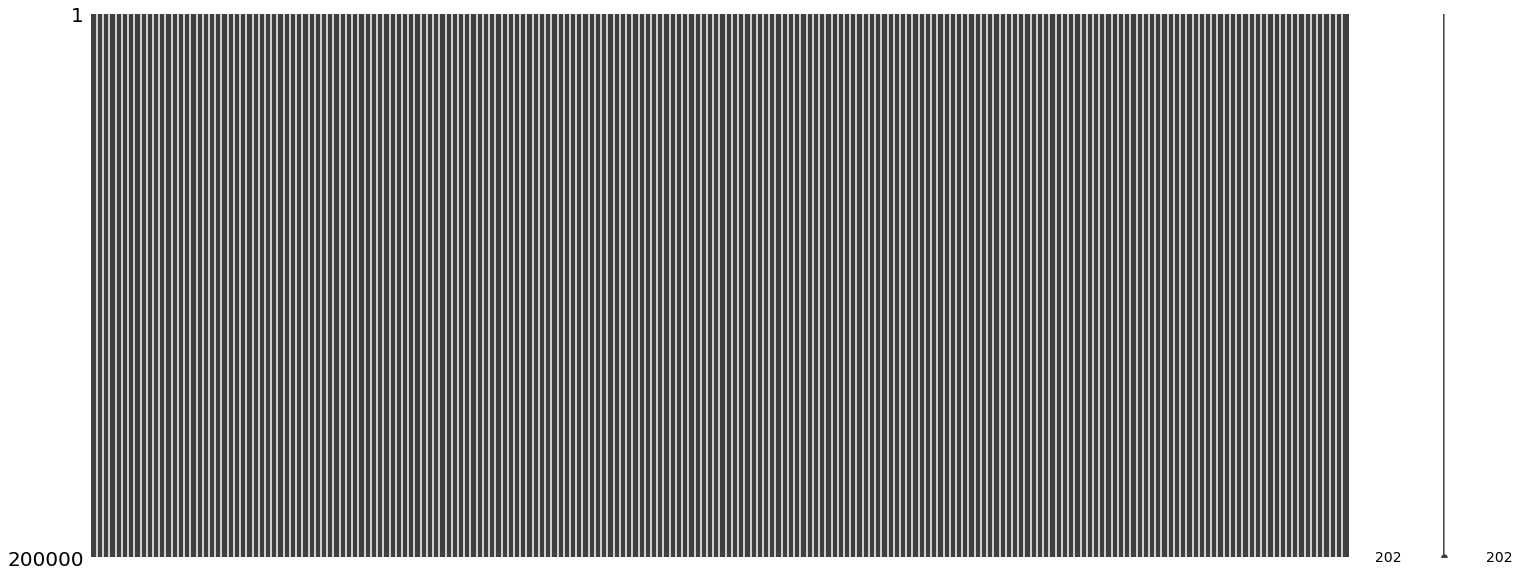

In [89]:
msno.matrix(data_train)

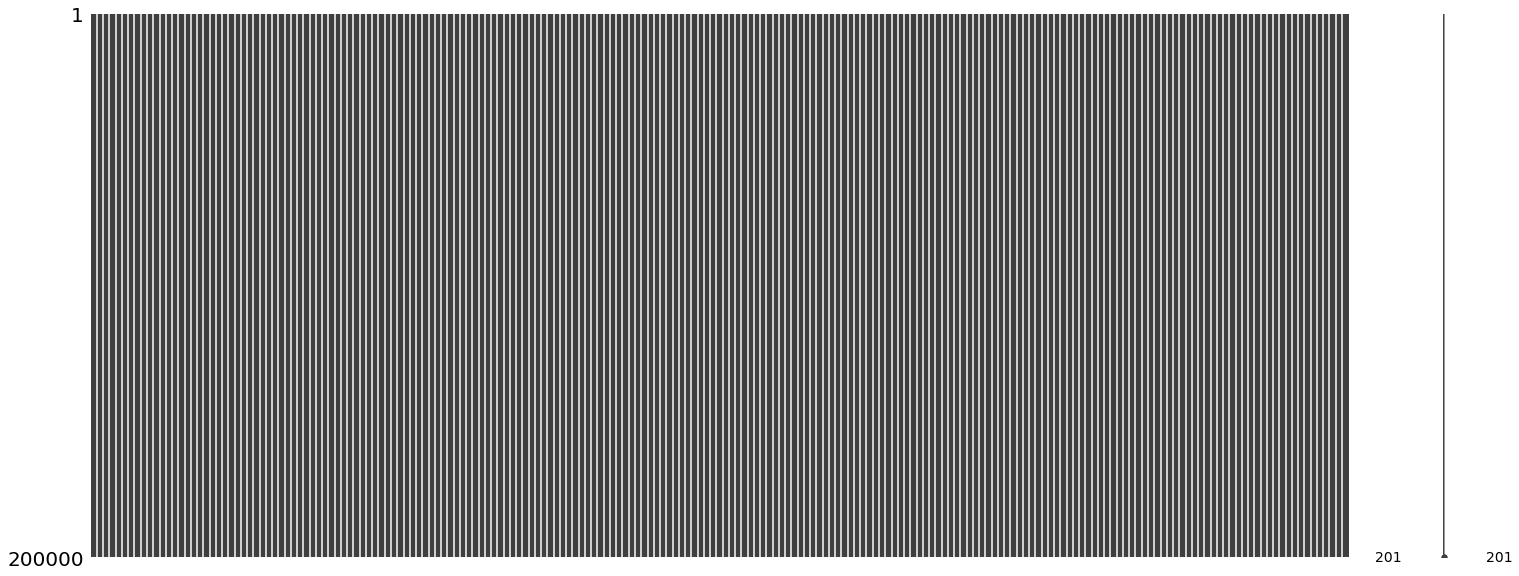

In [90]:
msno.matrix(data_test)

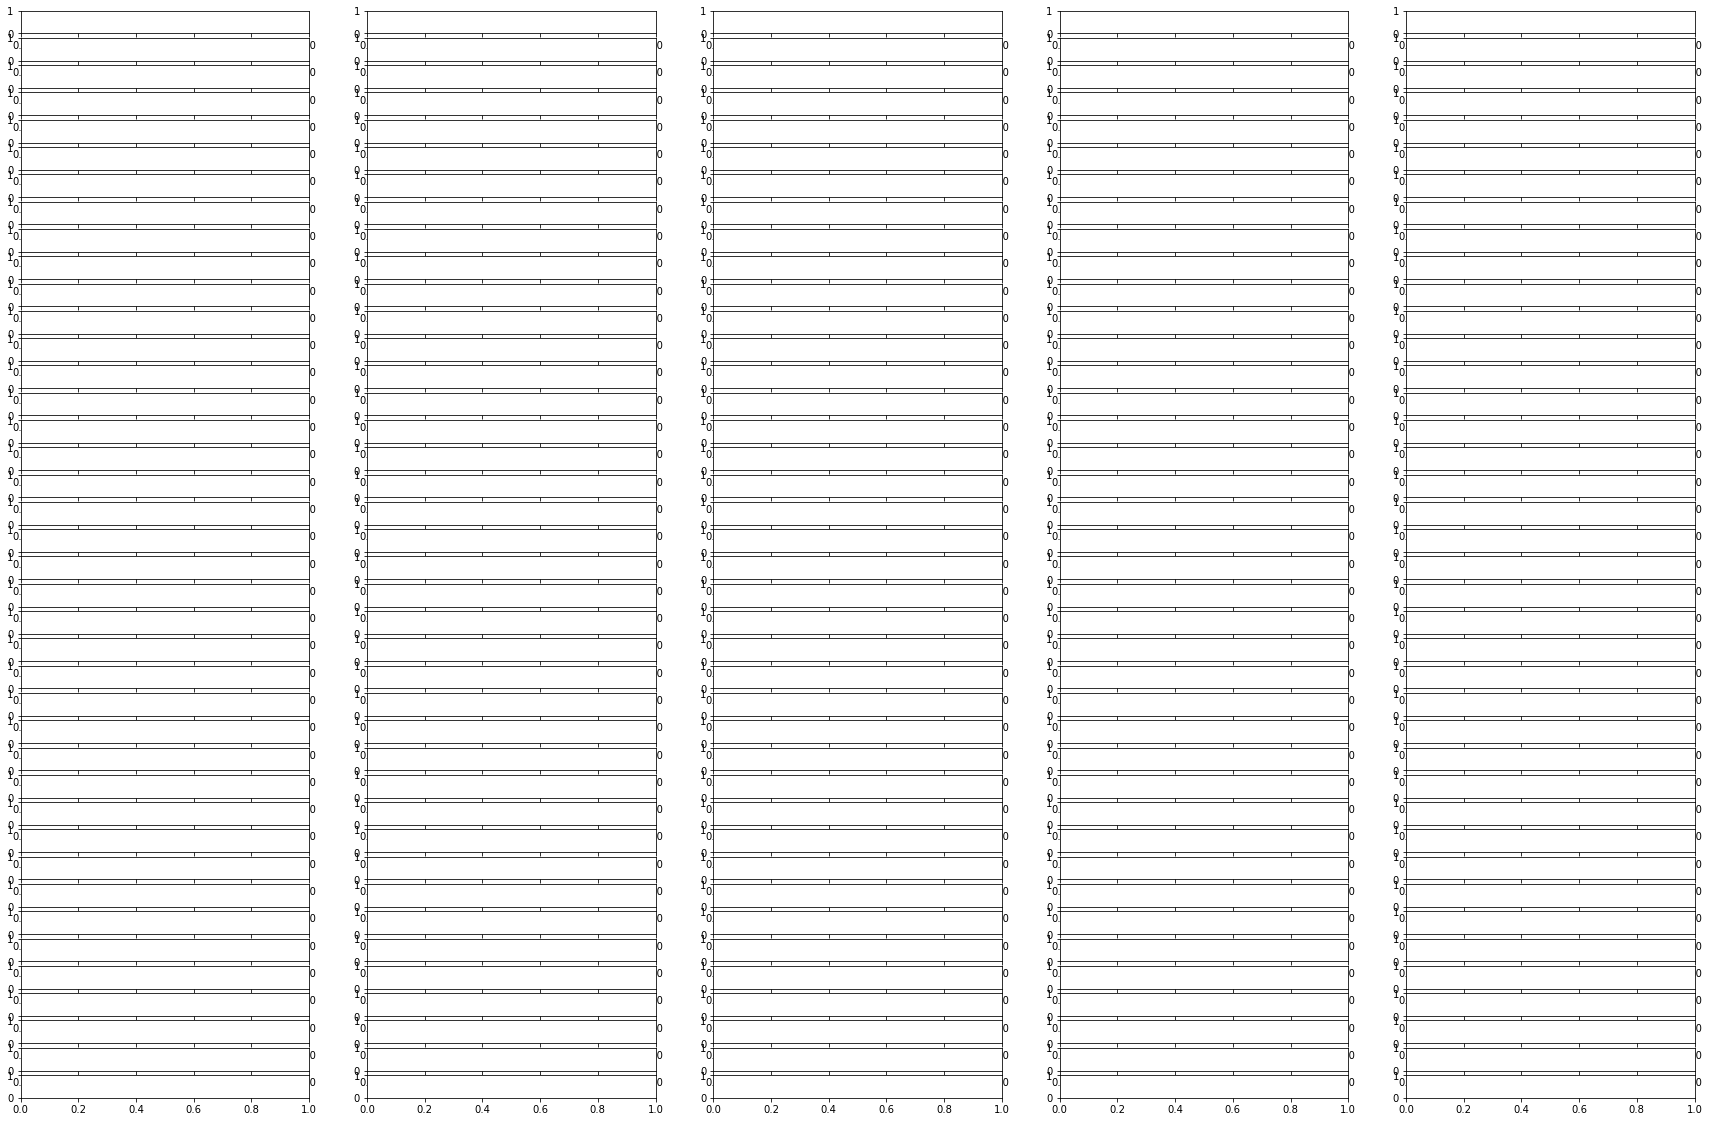

In [91]:
feature_with_na = [
    feature for feature in data_train.columns
    if data_train[feature].isnull().sum() > 1]

fig, axes = plt.subplots(40,5, figsize=(30,20))
for num, feature in enumerate(feature_with_na):
    data = data_train.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    statistic = data.groupby(feature)['target']
    axes[num//5, num%5].bar(statistic.index, statistic.values)
    axes[num//5, num%5].set_xticks([0,1])
    axes[num//5, num%5].set_ylabel(feature)
    
#получается не красиво, но пропусков не видно

(0.0, 202.0)

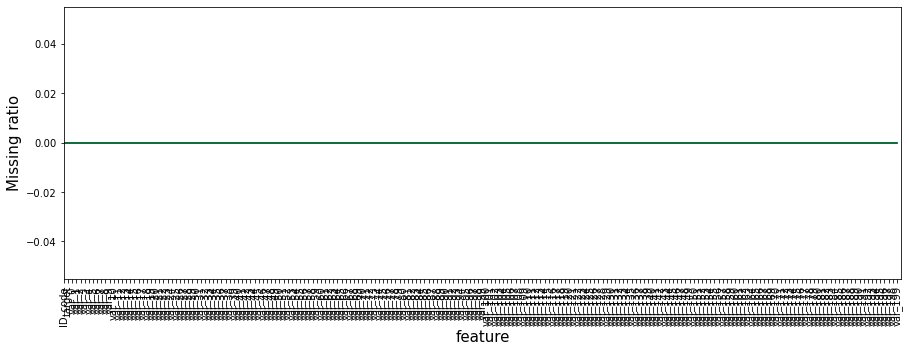

In [92]:
fig = plt.figure(figsize=(15,5))
plt.plot(data_train.isnull().mean(), label='train', color='blue')
plt.plot(data_test.isnull().mean(), label='test', color='green')
plt.xticks(range(data_train.shape[1]), data_train.columns, rotation=90)
plt.ylabel("Missing ratio", size=15)
plt.xlabel("feature", size=15)
plt.xlim(0, data_train.shape[1])


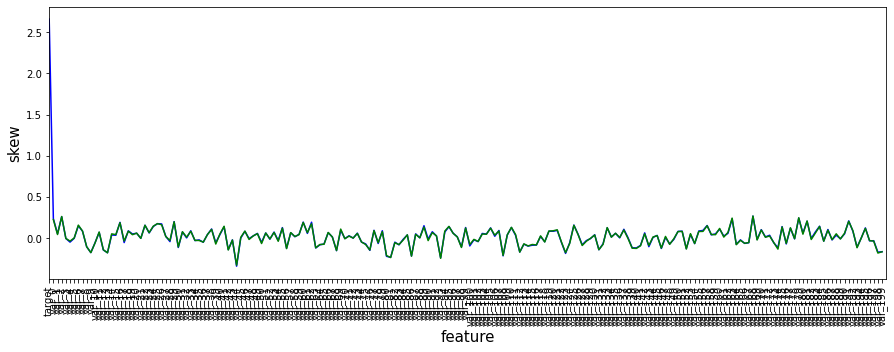

In [93]:
fig = plt.figure(figsize=(15,5))
train_stats, test_stats = data_train.skew(), data_test.skew()
plt.plot(train_stats, color='blue', label='train')
plt.plot(test_stats, color='green', label='test')
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.ylabel("skew", size=15)
plt.xlabel("feature", size=15)
plt.xlim(0, len(train_stats))
plt.show()

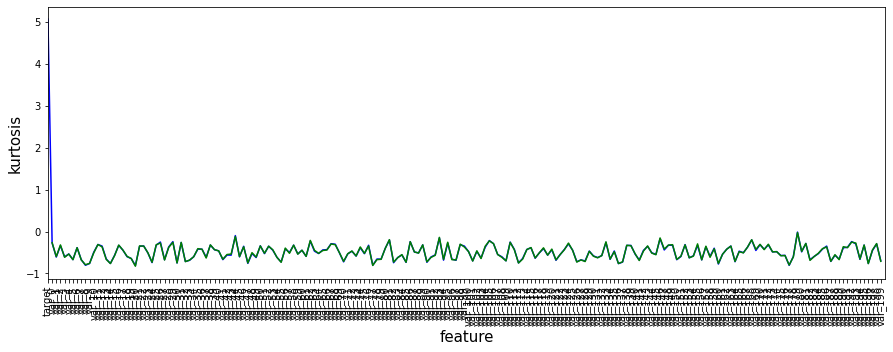

In [94]:
fig = plt.figure(figsize=(15,5))
train_stats, test_stats = data_train.kurtosis(), data_test.kurtosis()
plt.plot(train_stats, color='blue', label='train')
plt.plot(test_stats, color='green', label='test')
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.ylabel("kurtosis", size=15)
plt.xlabel("feature", size=15)
plt.xlim(0, len(train_stats))
plt.show()

__Вывод__: Пропусков нет. Разницы в перекосах между тестовыми и тренировычными данными нет.

---

__2. Сделать базовый анализ целевой переменной, сделать выводы;__

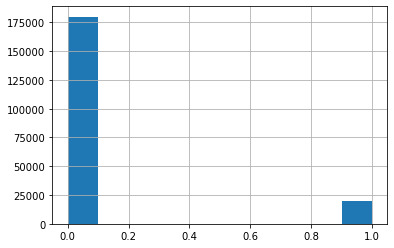

In [95]:
data_train['target'].hist()

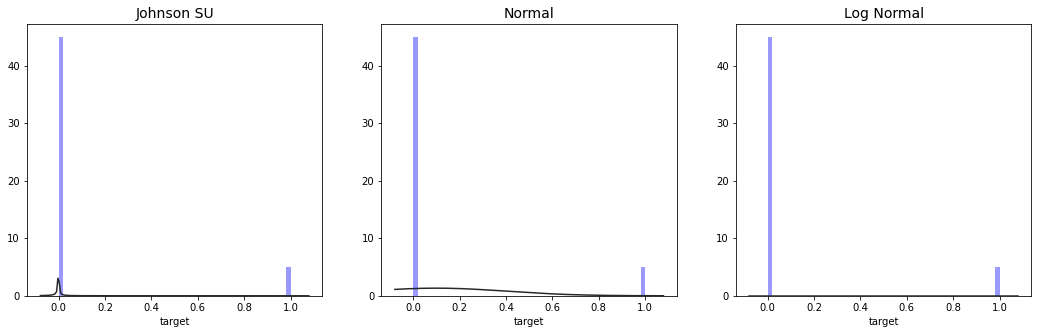

In [107]:
target = data_train["target"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].set_title("Johnson SU", fontsize=14)
sns.distplot(target, kde=False, color="blue", fit=st.johnsonsu, ax=axes[0])

axes[1].set_title("Normal", fontsize=14)
sns.distplot(target, kde=False, color="blue", fit=st.norm, ax=axes[1])

axes[2].set_title("Log Normal", fontsize=14)
sns.distplot(target, kde=False, color="blue", fit=st.lognorm, ax=axes[2])

__Вывод__: Целевой признак имеет ярко выраженный дисбаланс классов

___

__3. Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки__

D:\Compile\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


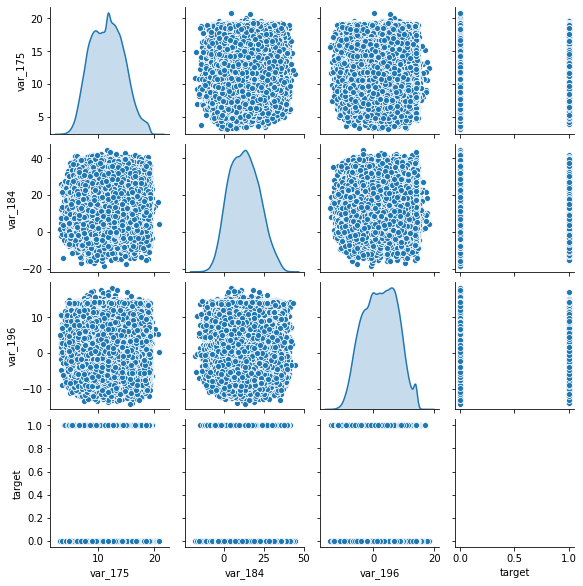

In [116]:
cut_features = ['var_0', 'var_1', 'var_2', 'var_5', 'var_9', 'var_10', 'var_13', 
                'var_20', 'var_26', 'var_40', 'var_55', 'var_80', 'var_106', 'var_109', 'var_139', 
                'var_175', 'var_184', 'var_196', 'target']
sns.pairplot(numerical_features[cut_features], height=2, kind="scatter", diag_kind="kde")
plt.show()

___

__4. Построить распределение основных статистики признаков (среднее, стандартное отклонение) в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;__

___

__5.Построить распределение коэффициентов корреляции между признаками. Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?__

In [103]:
correlation = numerical_features.corr()
corr_with_target = correlation["target"].sort_values(ascending = False)
correlation0 = numerical_features.loc[numerical_features['target'] == 0].corr()
correlation1 = numerical_features.loc[numerical_features['target'] == 1].corr()

Text(0, 0.5, 'Density')

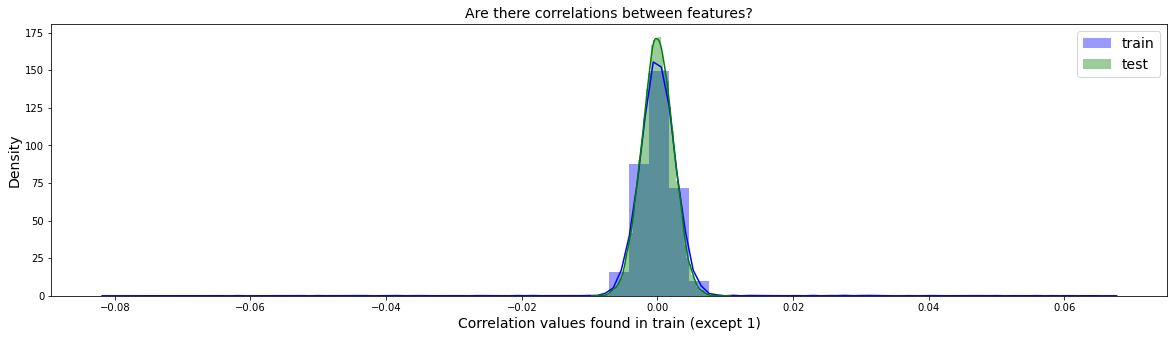

In [97]:
train_correlations = numerical_features.corr()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

columns = numerical_features.columns.tolist()
columns.remove("target")

test_correlations = data_test[columns].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)


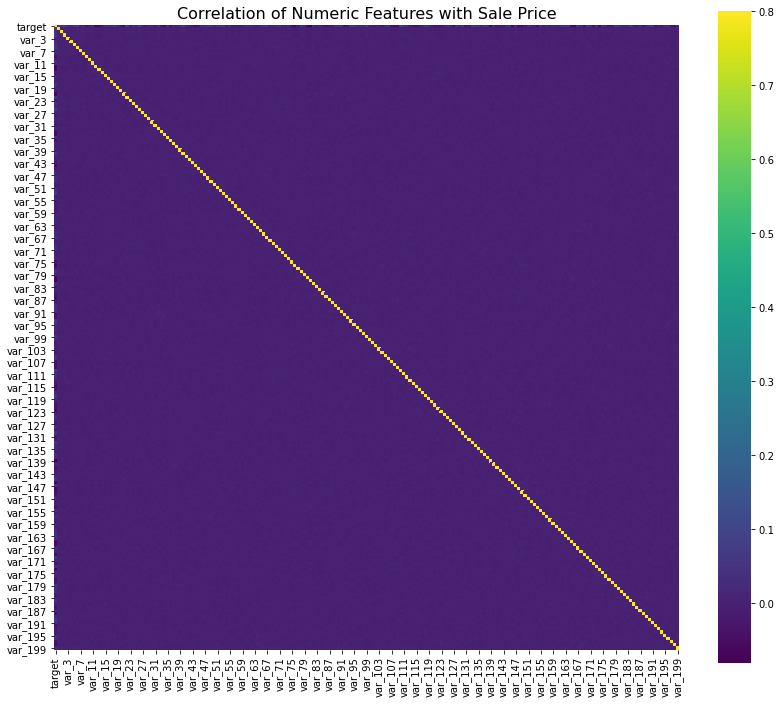

In [104]:
fig, axes = plt.subplots(figsize = (14,12))
plt.title("Correlation of Numeric Features with Sale Price", y=1, size=16)
sns.heatmap(correlation, square=True, vmax=0.8, cmap="viridis")

__Вывод__: Не понимаю как в разрезе множества обезличенных признаков сделать корреляцию с категориальной целовой переменной.   
Что заметил: между признаками не наблюдается линейная зависимость.

___

__6. Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.__

In [111]:
%%time
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestClassifier(**parameters)
forest.fit(numerical_features.drop("target", axis=1), target)

Wall time: 39.9 s


RandomForestClassifier(max_depth=6, n_estimators=25, n_jobs=2, random_state=27)

Text(0.5, 1.0, 'What are the top important features to start with?')

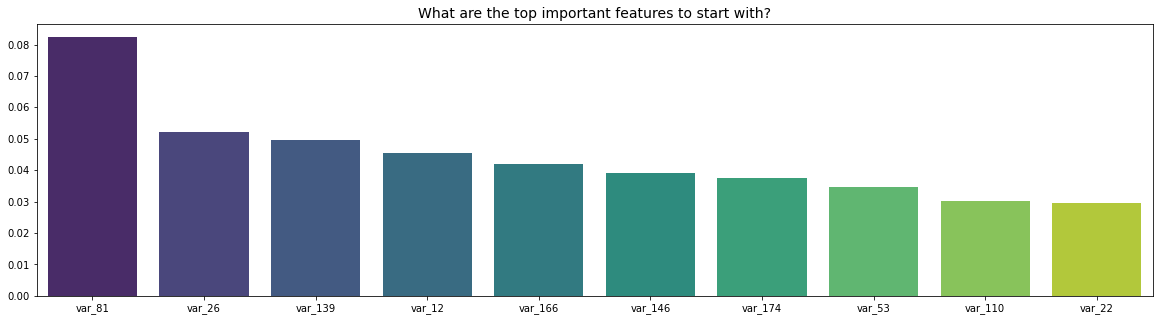

In [113]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]
feature_names = numerical_features.drop("target", axis=1).columns

plt.figure(figsize=(20, 5))
sns.barplot(x=feature_names[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)

___

__7. Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.__